# **Problem Statement**

One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. 


To solve this problem ABC pharma company approached an analytics company to automate this process of identification


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Read Dataset

In [20]:
data_H= pd.read_csv('E:/solo projects/Data_Glacier_virtual_internship/Data_Glacier_virtual_internship/Week08/Healthcare_dataset.csv')
data_H.head() 

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


#  **Data Understanding**
(Preprocessing)

In [3]:
print(f'Number of Observations: {data_H.shape[0]}')
print(f'Number of Features: {data_H.shape[1]}')

Number of Observations: 3424
Number of Features: 69


Data Info

In [4]:
data_H.info

<bound method DataFrame.info of        Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0        P1       Persistent    Male      Caucasian  Not Hispanic     West   
1        P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2        P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3        P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4        P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
...     ...              ...     ...            ...           ...      ...   
3419  P3420       Persistent  Female      Caucasian  Not Hispanic    South   
3420  P3421       Persistent  Female      Caucasian  Not Hispanic    South   
3421  P3422       Persistent  Female      Caucasian  Not Hispanic    South   
3422  P3423   Non-Persistent  Female      Caucasian  Not Hispanic    South   
3423  P3424   Non-Persistent  Female      Caucasian  Not Hispanic    South   

     Age_Bucket        Ntm_Spec

Features

In [5]:
data_H.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com


 Data types


In [6]:
data_H.dtypes

Ptid                              object
Persistency_Flag                  object
Gender                            object
Race                              object
Ethnicity                         object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object

In [8]:
print("Object Columns: ", data_H.select_dtypes(include = ["object"]).columns)


Object Columns:  Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Pe

In [9]:
print("Numerical Columns: ", data_H.select_dtypes(include = ["int64"]).columns)

Numerical Columns:  Index(['Dexa_Freq_During_Rx', 'Count_Of_Risks'], dtype='object')


Size of the data


In [10]:
data_H.size

236256

Check Missing values


In [14]:
missing_values = data_H.isna().sum()/len(data_H)*100
missing_values

Ptid                              0.0
Persistency_Flag                  0.0
Gender                            0.0
Race                              0.0
Ethnicity                         0.0
                                 ... 
Risk_Hysterectomy_Oophorectomy    0.0
Risk_Estrogen_Deficiency          0.0
Risk_Immobilization               0.0
Risk_Recurring_Falls              0.0
Count_Of_Risks                    0.0
Length: 69, dtype: float64

In [12]:
data_H.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


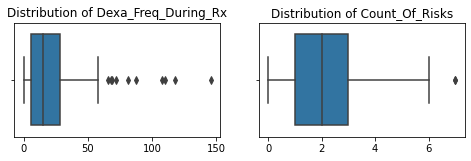

In [18]:
df = data_H.select_dtypes([int, float])

fig=plt.figure(figsize=(10,10))
for i ,columns in enumerate (df,1):
    ax= plt.subplot(5,3,i)
    sns.boxplot(data= df , x=df[columns])
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {columns}')
    plt.tight_layout(w_pad=3)
plt.show()

In [21]:
data_H=data_H.drop_duplicates()
data_H


,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


no duplicate data found

# EDA and Feature Engineering